In [301]:
#=============================Braintels Labs================================
#======================written by jorge orlando miranda ñahui
#========================jorge miranda redes neuronales====================================
#======================clasificación de la logica XOR ==================================
#importar las herramientas necesarias
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
print("EAGER MODO DESHABILITADO")


EAGER MODO DESHABILITADO


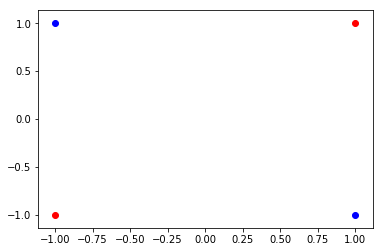

==================SECCIÓN GRAFO COMPUTACIONAL==============


In [302]:
#==================crear los datos de entrenamiento del problema del xor ===========
Input=np.array([[-1,-1],
                [-1,1],
                [1,-1],
                [1,1]])
Target=np.array([ [1,0,0,1], # neurona 1 salida deseada
                 [0,1,1,0]]) #neurona 2  salida deseada
colores=['r','b','b','r']
for a in range(4):
    plt.scatter(Input[a,0],Input[a,1],c=colores[a])
plt.show()
#definir parametros
R=2 # ESTE PARAMETRO INDICA LA CANTIDAD DE ENTRADAS , 2 ENTRADAS
B=2 # ESTE PARAMETRO INDICA EL TAMAÑO DEL MINI BATCH , 2 EJEMPLOS POR ACTUALIZACIÓN
So=2 # Número de neuronas de salida
epocas=90 # NÚMERO DE EPOCAS
lr=0.1
lossf=[]
print("==================SECCIÓN GRAFO COMPUTACIONAL==============")


In [303]:
()#==============================crear grafo ===============================
grafo=tf.Graph()
#========================agregar operaciones al grafo ==========================
with grafo.as_default():
    #==============CREAR PLACEHOLDER RxB (R =>2 entradas) , (B => Batch 2 ejemplos)
    x=tf.compat.v1.placeholder(shape=(R,None),dtype=tf.float32,name="X")
    #===============CREAR PLACEHOLDER Target SoxB
    T=tf.compat.v1.placeholder(shape=(So,None),dtype=tf.float32,name="T")
    #===============Crear Matriz de pesos sinapticos de capa oculta ShxR
    #Sh=> 2 neuronas ocultas , R entradas =>2
    Wh=tf.Variable(np.random.randn(3,2),dtype=tf.float32,name="Wh")
    #===============Crear Matriz de pesos sinapticos de capa de salida SoxSh
    Wo=tf.Variable(np.random.randn(2,3),dtype=tf.float32,name="Wo")
    #ENTRADA NETA v2 ShxB CAPA OCULTA
    V1=tf.matmul(Wh,x,name="v1")
    #SALIDA DE LA CAPA OCULTA RELU ShxB
    Y1=tf.nn.relu(V1,name="Y1")
    
    #=====================CAPA DE SALIDA===========================
    #ENTRADA NETA v2 SxB
    V2=tf.matmul(Wo,Y1,name="v2")
    #SALIDA FUNCIÓN DE ACTIVACIÓN SOFTMAX SxB
    Y2=tf.nn.sigmoid(V2,name="y2")
    #===================Crear Función De Costo
    loss=tf.reduce_mean(tf.square(T-Y2))
    #===================back propagation ==============
    opt=tf.compat.v1.train.GradientDescentOptimizer(learning_rate=lr)
    #===================minimizar función de costo
    train=opt.minimize(loss=loss)
     


print("============SECCIÓN SESIÓN PARA EJECUCIÓN DE GRAFO COMPUTACIONAL ================================")
    

============SECCIÓN SESIÓN PARA EJECUCIÓN DE GRAFO COMPUTACIONAL ================================


In [304]:
with tf.compat.v1.Session(graph=grafo) as sesion:
    #inicializar variables globales
    sesion.run(tf.compat.v1.global_variables_initializer())
    #para cada epoca 
    for epoca in range(epocas):
        #para cada mini-batch 2 mini batches
        for i in range(2):
            sesion.run(train,feed_dict={x:Input[i*B:i*B+B:1,:].reshape(R,B),T:Target[:,i*B:i*B+B:1]})
        #mostrar cada 5 epocas
        if epoca%5==0:
            lossf.append(sesion.run(loss,feed_dict={x:Input[i*B:i*B+B:1,:].reshape(R,B),T:Target[:,i*B:i*B+B:1]}))
    Whh=sesion.run(Wh)
    Woo=sesion.run(Wo)
    print("WH\n",sesion.run(Wh)," \n Wo \n",sesion.run(Wo))


    
print(lossf)

WH
 [[ 0.73852396 -0.7037522 ]
 [ 0.7766993  -0.23220058]
 [ 1.101566    0.654087  ]]  
 Wo 
 [[ 0.69190973  0.62935823 -1.5134383 ]
 [-0.66478133 -0.03405822  0.9698818 ]]
[0.2054712, 0.18902211, 0.17701411, 0.16806641, 0.16125315, 0.1559588, 0.1517691, 0.14839949, 0.1456504, 0.1433789, 0.14148054, 0.13987777, 0.13851207, 0.13733864, 0.13632269, 0.13543698, 0.13465989, 0.13397409]


18 18


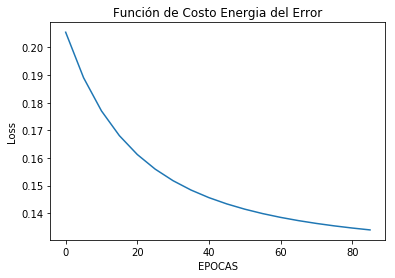

In [305]:
epoca=np.arange(0,epocas,5)
print(epoca.size,len(lossf))
plt.plot(epoca,lossf)
plt.title("Función de Costo Energia del Error")
plt.xlabel("EPOCAS")
plt.ylabel("Loss")
plt.show()